<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer following questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [21]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [24]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5220 - accuracy: 0.7895 - val_loss: 0.4004 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3127 - accuracy: 0.9005 - val_loss: 0.3184 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2296 - accuracy: 0.9231 - val_loss: 0.3073 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1804 - accuracy: 0.9402 - val_loss: 0.2793 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1469 - accuracy: 0.9541 - val_loss: 0.2788 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1176 - accuracy: 0.9637 - val_loss: 0.3159 - val_accuracy: 0.8748
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0970 - accuracy: 0.9719 - val_loss: 0.3361 - val_accuracy: 0.8785
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [29]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [30]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
history2 = model2.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5009 - accuracy: 0.7668 - val_loss: 0.3641 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2788 - accuracy: 0.9057 - val_loss: 0.3609 - val_accuracy: 0.8435
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2084 - accuracy: 0.9276 - val_loss: 0.2753 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1581 - accuracy: 0.9480 - val_loss: 0.2811 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1271 - accuracy: 0.9589 - val_loss: 0.2917 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1031 - accuracy: 0.9695 - val_loss: 0.3677 - val_accuracy: 0.8678
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0859 - accuracy: 0.9733 - val_loss: 0.3355 - val_accuracy: 0.8800
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

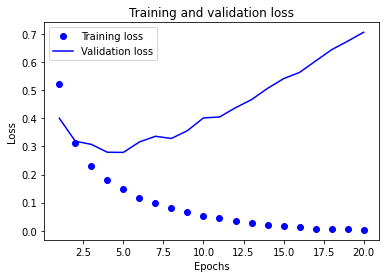

In [34]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [35]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_dr = model2_dr.fit(partial_x_train,
               partial_y_train,
               epochs=20,
               batch_size=512,
               validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6354 - accuracy: 0.6403 - val_loss: 0.5293 - val_accuracy: 0.8498
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5054 - accuracy: 0.7829 - val_loss: 0.4101 - val_accuracy: 0.8694
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4157 - accuracy: 0.8441 - val_loss: 0.3345 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3434 - accuracy: 0.8775 - val_loss: 0.3068 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3005 - accuracy: 0.9013 - val_loss: 0.2868 - val_accuracy: 0.8914
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2660 - accuracy: 0.9129 - val_loss: 0.2801 - val_accuracy: 0.8905
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2327 - accuracy: 0.9253 - val_loss: 0.3268 - val_accuracy: 0.8815
Epoch 8/20
30

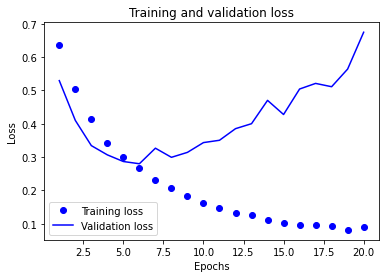

In [36]:
import matplotlib.pyplot as plt
history2_dr_dict = history2_dr.history
loss_values = history2_dr_dict["loss"]
val_loss_values = history2_dr_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [37]:
## Add l1 regularization on the second dense layers 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [38]:
model2_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5793 - accuracy: 0.7820 - val_loss: 0.4456 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3647 - accuracy: 0.8983 - val_loss: 0.3638 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2743 - accuracy: 0.9265 - val_loss: 0.3338 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2239 - accuracy: 0.9427 - val_loss: 0.3298 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1854 - accuracy: 0.9544 - val_loss: 0.3242 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1589 - accuracy: 0.9635 - val_loss: 0.3354 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1388 - accuracy: 0.9706 - val_loss: 0.3609 - val_accuracy: 0.8797
Epoch 8/20
30

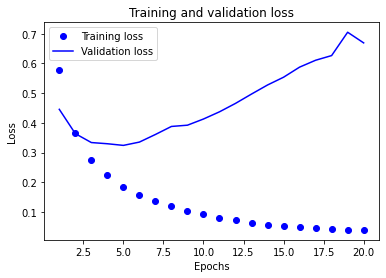

In [39]:
import matplotlib.pyplot as plt
history2_l1_dict = history2_l1.history
loss_values = history2_l1_dict["loss"]
val_loss_values = history2_l1_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

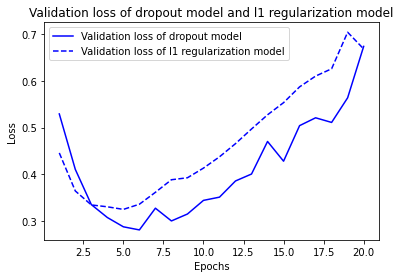

In [45]:
plt.clf()
acc = history2_dr.history["val_loss"]
val_acc = history2_l1.history["val_loss"]
plt.plot(epochs, acc, "b-", label="Validation loss of dropout model")
plt.plot(epochs, val_acc, "b--", label="Validation loss of l1 regularization model")
plt.title("Validation loss of dropout model and l1 regularization model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()